In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import jsonlines
from functools import reduce
import statistics
import math
import os
import json
import ast
import warnings
pd.options.mode.copy_on_write = True
pd.set_option('display.max_colwidth', None)
#pd.set_option('future.no_silent_downcasting', True)
warnings.simplefilter(action='ignore', category=FutureWarning)

#uses various functions
from dataclean_func import *

In [3]:
excluded_dem_vids_task=pd.read_csv('U:/Documents/Disgust learning project/github/disgust_reversal_learning-final/csvs/dem_vids_task_excluded.csv')
excluded_demographics=pd.read_csv('U:/Documents/Disgust learning project/github/disgust_reversal_learning-final/csvs/demographics_excluded.csv')

In [4]:
##check demographic numbers for included participants
age_categories=[]
for participant in set(excluded_dem_vids_task.participant_no):
    sub_df=excluded_dem_vids_task[excluded_dem_vids_task.participant_no==participant]
    age=sub_df.self_report_age.iloc[0]
    if 18<=age<=24:
        age_cat='18-24'
    elif 25<=age<=34:
        age_cat='25-34'
    elif 35<=age<=44:
        age_cat='35-44'
    elif 45<=age<=54:
        age_cat='45-54'
    elif age>=55:
        age_cat='55+'
    else:
        age_cat='error'
    age_categories.append({
        'participant_no': participant,
        'age_category': age_cat
    })
category_demographics=excluded_demographics.merge(pd.DataFrame(age_categories), on='participant_no', how='left')

##add target numbers
rep_sample_df=category_demographics.groupby(['age_category', 'prolific_sex', 'cleaned_diagnosis']).size().reset_index(name='count')
for i in range(20):
    old_row=rep_sample_df.iloc[i]
    if old_row.age_category=='18-24' and old_row.prolific_sex =='Female' and old_row.cleaned_diagnosis == 'Yes':
        dem_cat='18-24 female with a psychiatric diagnosis'
        target=4
        target_percentage=0.013
    if old_row.age_category=='18-24' and old_row.prolific_sex =='Female' and old_row.cleaned_diagnosis == 'No':
        dem_cat='18-24 female without a psychiatric diagnosis'
        target=15
        target_percentage=0.046
    if old_row.age_category=='18-24' and old_row.prolific_sex =='Male' and old_row.cleaned_diagnosis == 'Yes':
        dem_cat='18-24 male with a psychiatric diagnosis'
        target=3
        target_percentage=0.008
    if old_row.age_category=='18-24' and old_row.prolific_sex =='Male' and old_row.cleaned_diagnosis == 'No':
        dem_cat='18-24 male without a psychiatric diagnosis'
        target=17
        target_percentage=0.052
    if old_row.age_category=='25-34' and old_row.prolific_sex =='Female' and old_row.cleaned_diagnosis == 'Yes':
        dem_cat='25-34 female with a psychiatric diagnosis'
        target=10
        target_percentage=0.03
    if old_row.age_category=='25-34' and old_row.prolific_sex =='Female' and old_row.cleaned_diagnosis == 'No':
            dem_cat='25-34 female without a psychiatric diagnosis'
            target=18
            target_percentage=0.056
    if old_row.age_category=='25-34' and old_row.prolific_sex =='Male' and old_row.cleaned_diagnosis == 'Yes':
            dem_cat='25-34 male with a psychiatric diagnosis'
            target=5
            target_percentage=0.016
    if old_row.age_category=='25-34' and old_row.prolific_sex =='Male' and old_row.cleaned_diagnosis == 'No':
            dem_cat='25-34 male without a psychiatric diagnosis'
            target=23
            target_percentage=0.07
    if old_row.age_category=='35-44' and old_row.prolific_sex =='Female' and old_row.cleaned_diagnosis == 'Yes':
        dem_cat='35-44 female with a psychiatric diagnosis'
        target=11
        target_percentage=0.033
    if old_row.age_category=='35-44' and old_row.prolific_sex =='Female' and old_row.cleaned_diagnosis == 'No':
            dem_cat='35-44 female without a psychiatric diagnosis'
            target=18
            target_percentage=0.057
    if old_row.age_category=='35-44' and old_row.prolific_sex =='Male' and old_row.cleaned_diagnosis == 'Yes':
            dem_cat='25-44 male with a psychiatric diagnosis'
            target=6
            target_percentage=0.02
    if old_row.age_category=='35-44' and old_row.prolific_sex =='Male' and old_row.cleaned_diagnosis == 'No':
            dem_cat='25-44 male without a psychiatric diagnosis'
            target=22
            target_percentage=0.068
    if old_row.age_category=='45-54' and old_row.prolific_sex =='Female' and old_row.cleaned_diagnosis == 'Yes':
        dem_cat='45-54 female with a psychiatric diagnosis'
        target=10
        target_percentage=0.032
    if old_row.age_category=='45-54' and old_row.prolific_sex =='Female' and old_row.cleaned_diagnosis == 'No':
            dem_cat='45-54 female without a psychiatric diagnosis'
            target=18
            target_percentage=0.056
    if old_row.age_category=='45-54' and old_row.prolific_sex =='Male' and old_row.cleaned_diagnosis == 'Yes':
            dem_cat='45-54 male with a psychiatric diagnosis'
            target=6
            target_percentage=0.02
    if old_row.age_category=='45-54' and old_row.prolific_sex =='Male' and old_row.cleaned_diagnosis == 'No':
            dem_cat='45-54 male without a psychiatric diagnosis'
            target=22
            target_percentage=0.067
    if old_row.age_category=='55+' and old_row.prolific_sex =='Female' and old_row.cleaned_diagnosis == 'Yes':
        dem_cat='55+ female with a psychiatric diagnosis'
        target=25
        target_percentage=0.078
    if old_row.age_category=='55+' and old_row.prolific_sex =='Female' and old_row.cleaned_diagnosis == 'No':
            dem_cat='55+ female without a psychiatric diagnosis'
            target=37
            target_percentage=0.113
    if old_row.age_category=='55+' and old_row.prolific_sex =='Male' and old_row.cleaned_diagnosis == 'Yes':
            dem_cat='55+ male with a psychiatric diagnosis'
            target=13
            target_percentage=0.041
    if old_row.age_category=='55+' and old_row.prolific_sex =='Male' and old_row.cleaned_diagnosis == 'No':
            dem_cat='55+ male without a psychiatric diagnosis'
            target=40
            target_percentage=0.124
    
    rep_sample_df.loc[i,'target']=target
    rep_sample_df.loc[i,'target_percentage']=target_percentage*100
    rep_sample_df.loc[i, 'dem_cat']=dem_cat
rep_sample_df['abs_difference']=rep_sample_df['target']- rep_sample_df['count']
rep_sample_df['actual_percentage']=(rep_sample_df['count']/340)*100
rep_sample_df['percentage_difference']=rep_sample_df['target_percentage']-rep_sample_df['actual_percentage']

rep_sample_df.round(1)[['age_category', 'prolific_sex', 'count', 'target', 'actual_percentage', 'target_percentage', 'percentage_difference']]

,age_category,prolific_sex,count,target,actual_percentage,target_percentage,percentage_difference
0,18-24,Female,16,15.0,4.7,4.6,-0.1
1,18-24,Female,4,4.0,1.2,1.3,0.1
2,18-24,Male,18,17.0,5.3,5.2,-0.1
3,18-24,Male,3,3.0,0.9,0.8,-0.1
4,25-34,Female,19,18.0,5.6,5.6,0.0
5,25-34,Female,11,10.0,3.2,3.0,-0.2
6,25-34,Male,23,23.0,6.8,7.0,0.2
7,25-34,Male,7,5.0,2.1,1.6,-0.5
8,35-44,Female,21,18.0,6.2,5.7,-0.5
9,35-44,Female,11,11.0,3.2,3.3,0.1


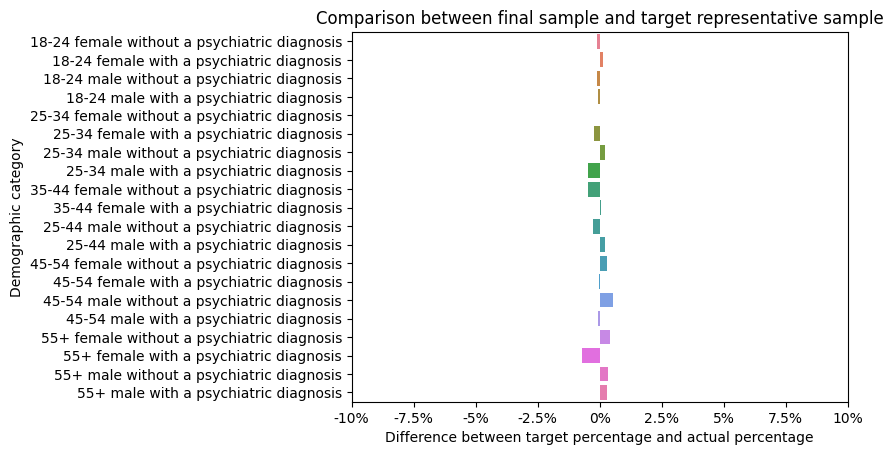

In [5]:
sns.barplot(data=rep_sample_df, x='percentage_difference', y='dem_cat', palette='husl')
plt.xlim(-10, 10)
plt.xlabel('Difference between target percentage and actual percentage')
plt.xticks([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10], ['-10%', '-7.5%', '-5%', '-2.5%', '0%', '2.5%', '5%', '7.5%', '10%'])
plt.ylabel('Demographic category')
plt.title('Comparison between final sample and target representative sample')
plt.savefig('checking_exclusions_demographics.jpeg', dpi=300, bbox_inches='tight')

In [7]:
excluded_demographics.cleaned_diagnosis.value_counts(normalize=True)

cleaned_diagnosis
No     0.7
Yes    0.3
Name: proportion, dtype: float64

In [8]:
excluded_demographics

,Unnamed: 0,diagnosis,participant_no,cleaned_diagnosis,depression,anxiety,adhd,autism,ptsd,eating_disorder,...,digit_span,prolific_age,prolific_sex,prolific_MH,time taken,self_report_gender,self_report_assigned-at-birth,self_report_age,aligns,jatos_time_taken
0,0,NaN,1.0,No,0,0,0,0,0,0,...,8.0,61,Female,No,43.616667,Female,Yes,61,True,43.376950
1,1,NaN,2.0,No,0,0,0,0,0,0,...,6.0,52,Male,No,40.283333,Male,Yes,52,True,40.037567
2,2,NaN,3.0,No,0,0,0,0,0,0,...,8.0,61,Female,No,58.200000,Female,Yes,61,True,57.892800
3,4,"depression, anxiety sociaphobia",5.0,Yes,1,1,0,0,0,0,...,6.0,60,Male,Yes,66.133333,Male,Yes,61,False,65.894933
4,5,No,6.0,No,0,0,0,0,0,0,...,16.0,23,Male,No,67.533333,Male,Yes,23,True,66.502150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,399,no,400.0,No,0,0,0,0,0,0,...,9.0,60,Male,No,70.883333,Male,Yes,60,True,70.616800
336,400,NO,401.0,No,0,0,0,0,0,0,...,8.0,35,Female,No,48.616667,Female,Yes,35,True,47.505067
337,401,NaN,402.0,No,0,0,0,0,0,0,...,7.0,46,Male,No,41.100000,Male,Yes,46,True,40.866017
338,402,Dqepression,403.0,Yes,1,0,0,0,0,0,...,7.0,47,Female,Yes,95.150000,Female,Yes,47,True,94.600583
